In [34]:
from load import file_read
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel



In [28]:
filepath = "/Users/bensappey/Downloads/Source_file_METEC_04NOV_2021_methane_background.csv"

spectrum = file_read(filepath=filepath)
print(spectrum)
print(spectrum.columns)




       Wavenumber Intensity
      6002.932793  0.114082
0     6002.932638  0.114254
1     6002.932479  0.114432
2     6002.932324  0.114394
3     6002.932166  0.114453
4     6002.932011  0.114896
...           ...       ...
4994  6002.151918  0.011916
4995  6002.151759  0.011867
4996  6002.151604  0.011884
4997  6002.151446  0.011698
4998  6002.151291  0.011853

[4999 rows x 2 columns]
MultiIndex([('Wavenumber', '6002.932793'),
            ( 'Intensity',    '0.114082')],
           )


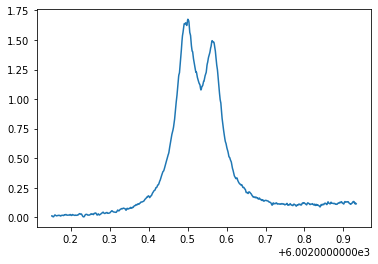

In [40]:

plt.plot(spectrum["Wavenumber"],spectrum["Intensity"])
plt.show()

In [52]:
x = spectrum['Wavenumber'].values
y = spectrum['Intensity'].values
print(x)
print(y)
x_crop = x[2500:]
y_crop = y[2500:]
%matplotlib
plt.plot(x_crop,y_crop)
plt.plot(x,y+1)
plt.show()

[[6002.932638]
 [6002.932479]
 [6002.932324]
 ...
 [6002.151604]
 [6002.151446]
 [6002.151291]]
[[0.114254]
 [0.114432]
 [0.114394]
 ...
 [0.011884]
 [0.011698]
 [0.011853]]
Using matplotlib backend: MacOSX


In [43]:

mod = VoigtModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8
    # data points      = 4999
    # variables        = 3
    chi-square         = 1560.46608
    reduced chi-square = 0.31234309
    Akaike info crit   = -5814.10248
    Bayesian info crit = -5794.55150
    R-squared          = -0.54417628
##  Warning: uncertainties could not be estimated:
    center:     at initial value
    sigma:      at boundary
[[Variables]]
    amplitude:  1.1425e-16 +/-        nan (nan%) (init = 0)
    center:     6002.93264 +/-        nan (nan%) (init = 6002.933)
    sigma:      0.00000000 +/--0.00000000 (nan%) (init = 0)
    gamma:      0.00000000 +/- 0.00000000 (nan%) == 'sigma'
    fwhm:       0.00000000 +/- 0.00000000 (nan%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     0.11425400 +/- 0.00000000 (0.00%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'


In [61]:
voigt1 = VoigtModel(prefix='v1_')
pars.update(voigt1.make_params(center=dict(value=6.45e3, min=6.40e3, max=6.50e3),
                               sigma=dict(value=1, min=0),
                               amplitude=dict(value=160, min=0)))

voigt2 = VoigtModel(prefix='v2_')
pars.update(voigt2.make_params(center=dict(value=6.55e3, min=6.5e3, max=6.6e3),
                               sigma=dict(value=1, min=0),
                               amplitude=dict(value=150, min=0)))

mod = voigt1 + voigt2 

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(correl_mode='list'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['v1_'], '--', label='Voigt component 1')
axes[1].plot(x, comps['v2_'], '--', label='Voigt component 2')
# axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()
# <end exam

[[Model]]
    (Model(voigt, prefix='v1_') + Model(voigt, prefix='v2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 602
    # data points      = 4999
    # variables        = 9
    chi-square         = 1010.49392
    reduced chi-square = 0.20250379
    Akaike info crit   = -7974.39447
    Bayesian info crit = -7915.74153
    R-squared          = 5.4687e-05
##  Warning: uncertainties could not be estimated:
    center:        at initial value
    sigma:         at boundary
    v1_center:     at boundary
    v2_center:     at boundary
[[Variables]]
    amplitude:     0.00000000 (init = 0)
    center:        6002.93264 (init = 6002.933)
    sigma:         0.00000000 (init = 0)
    gamma:         0.00000000 == 'sigma'
    fwhm:          0.00000000 == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:        0.00000000 == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
    v1_amplitude:  4406.845